### Ejecutar todo el flujo de la aplicacion

In [1]:
import os 
images_path = os.path.sep.join([os.getcwd(),'data','images'])

### Select images

In [2]:
import os 

to_replace_image_path = os.path.sep.join([images_path,'cats','1.jpg'])
object_to_replace = 'cat'

to_paste_image_path = os.path.sep.join([images_path,'dogs','3.jpg'])
object_to_paste = 'dog'


In [6]:
from src.features.image import ImageFeature
from diffusers.utils import make_image_grid


def process(image_path, cls):
    image = ImageFeature(image_path=image_path, name=f"{cls} image")
    image.generate_cls_masks(cls)
    cats = image.cls_masks[cls]

    detections = image.save_xor_plot(masks=cats, plot=False, save=False)
    image_mask = cats[0].generate_image_mask_background_origin()
    input_image = image.image
    return [input_image, detections, image_mask]



0: 448x640 1 cat, 252.4ms
Speed: 8.7ms preprocess, 252.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


IndexError: image index out of range

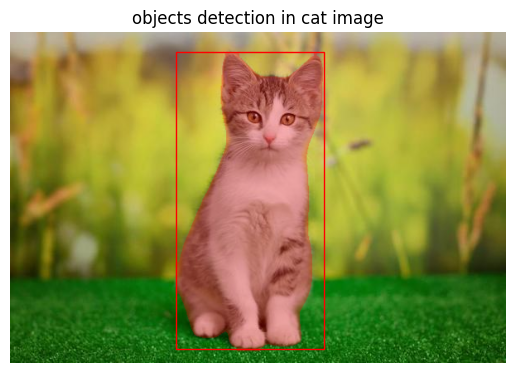

In [7]:
from diffusers.utils import make_image_grid
result = process(to_replace_image_path, object_to_replace)
make_image_grid(result , rows=1, cols=3)



0: 384x640 1 dog, 248.0ms
Speed: 2.6ms preprocess, 248.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


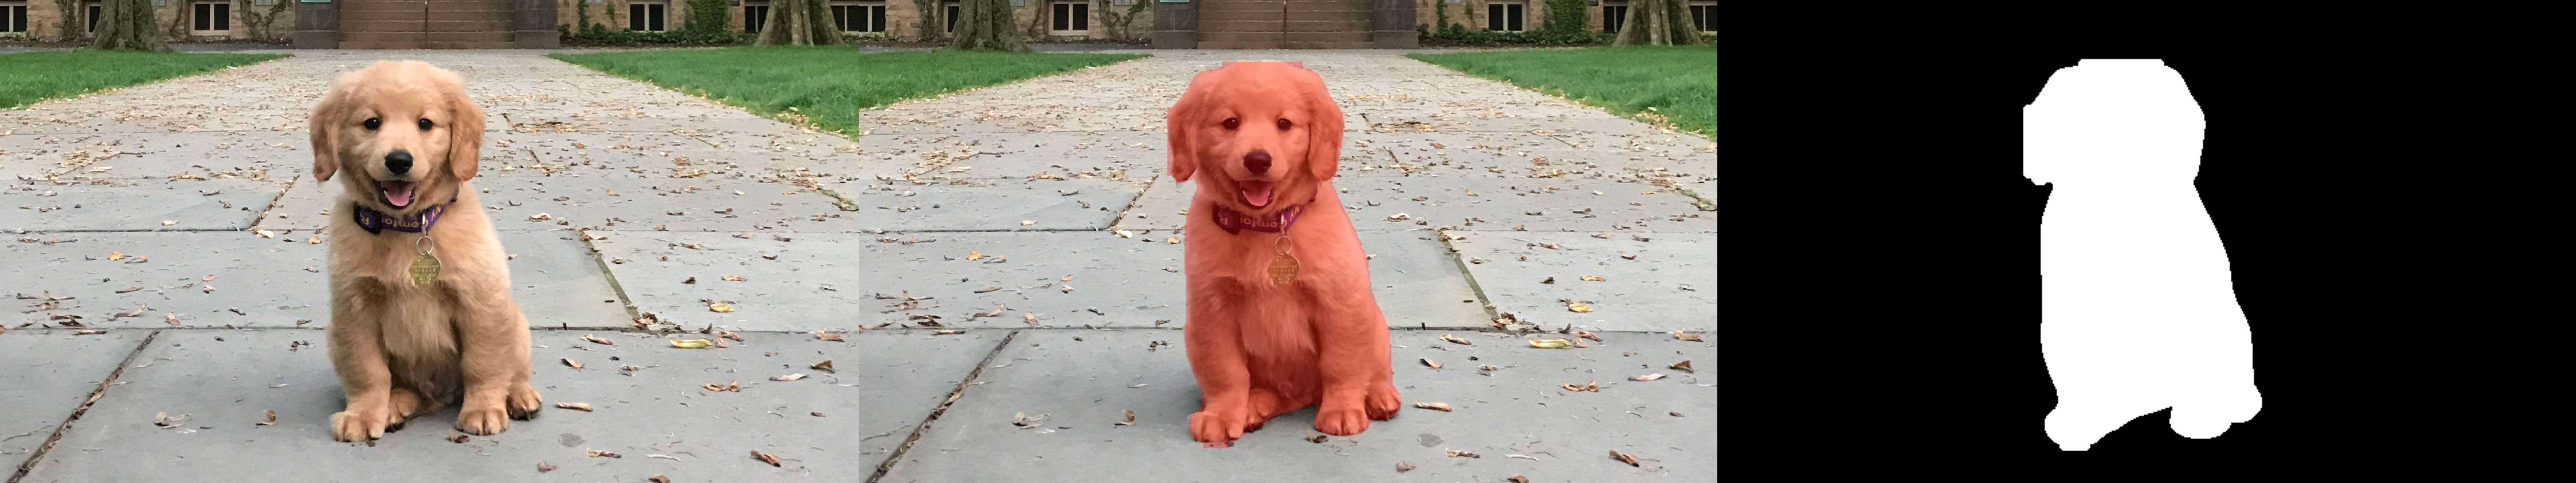

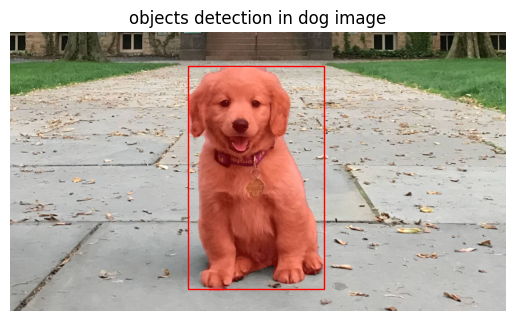

In [5]:
from diffusers.utils import make_image_grid
result = process(to_paste_image_path, object_to_paste)
make_image_grid(result , rows=1, cols=3)


## Fill
Usar con GPU de ser posible

In [ ]:
cls = 'cat'
image = ImageFeature(image_path=to_replace_image_path, name=f"{cls} image")
image.generate_cls_masks(cls)
cats = image.cls_masks[cls]
mak = cats[0]

img = image.fill_mask(mask=mak)["image"]

In [ ]:
import matplotlib.pyplot as plt

# Muestra la imagen
plt.imshow(img)
plt.axis('off')  # Desactiva las marcas del eje
plt.show()